**House Prices - Advanced Regression Techniques**

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [1]:
#Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import OrdinalEncoder
from sklearn import feature_selection
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, train_test_split
from sklearn import model_selection
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn import ensemble
from xgboost import XGBRegressor
from feature_engine.selection import RecursiveFeatureElimination



#Linear Regression
#Xgboost
#Random Forest
#Gradient boosting trees


%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None


import warnings
warnings.filterwarnings('ignore') 

In [2]:
# load the Data in DataFrames

data_raw = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')
#Create a copy of the training data that will be playing with
data = data_raw.copy(deep=True)
#check data shape
data.shape

(1460, 81)

In [3]:
data_val.shape

(1459, 80)

In [4]:
data_cleaner = [data, data_val]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print(data.isna().sum())
print('--'*10)
print(data_val.isna().sum())
print('--'*10)
data.describe(include = 'all')

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

<Axes: >

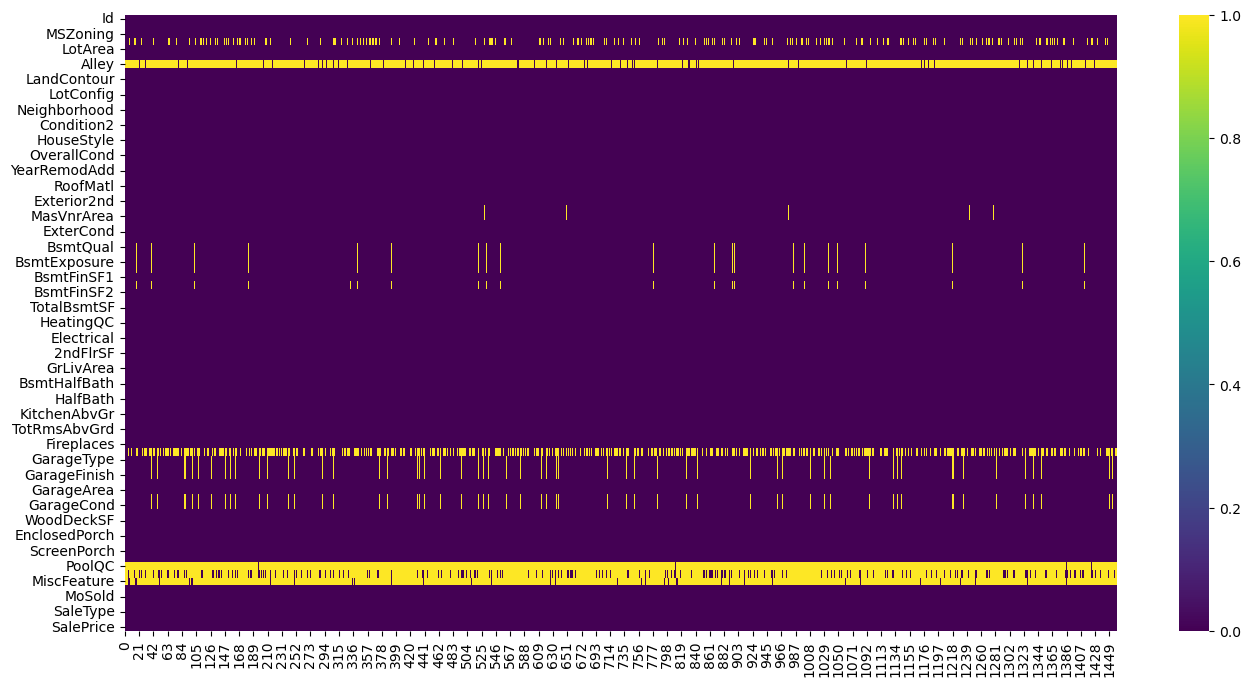

In [7]:
plt.figure(figsize=(16,8))
sns.heatmap(data.isna().transpose(),cmap='viridis')

<Axes: >

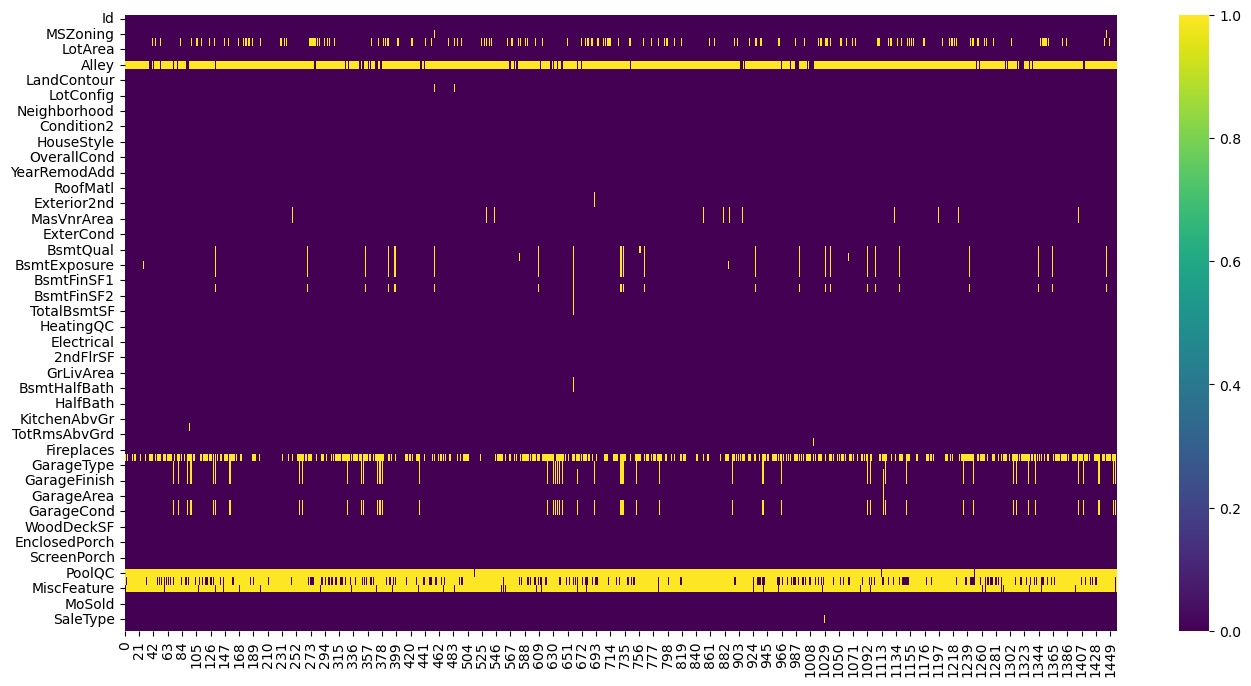

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(data_val.isna().transpose(),cmap='viridis')

In [9]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
percent_missing_data = data.isnull().sum() * 100 / len(data)
missing_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing_data})

missing_df[missing_df.percent_missing > 0]

,column_name,percent_missing
LotFrontage,LotFrontage,17.739726
Alley,Alley,93.767123
MasVnrType,MasVnrType,0.547945
MasVnrArea,MasVnrArea,0.547945
BsmtQual,BsmtQual,2.534247
BsmtCond,BsmtCond,2.534247
BsmtExposure,BsmtExposure,2.602740
BsmtFinType1,BsmtFinType1,2.534247
BsmtFinType2,BsmtFinType2,2.602740
Electrical,Electrical,0.068493


In [11]:
print(data['Alley'].unique())
print('-'*10)
print(data['PoolQC'].unique())
print('-'*10)
print(data['Fence'].unique())
print('-'*10)
print(data['MiscFeature'].unique())
print('-'*10)
print(data['FireplaceQu'].unique())

[nan 'Grvl' 'Pave']
----------
[nan 'Ex' 'Fa' 'Gd']
----------
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
----------
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
----------
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [12]:
percent_missing_data_val = data_val.isnull().sum() * 100 / len(data_val)
missing_df_val = pd.DataFrame({'column_name': data_val.columns,
                                 'percent_missing': percent_missing_data_val})

missing_df_val[missing_df_val.percent_missing > 0]

,column_name,percent_missing
MSZoning,MSZoning,0.274160
LotFrontage,LotFrontage,15.558602
Alley,Alley,92.666210
Utilities,Utilities,0.137080
Exterior1st,Exterior1st,0.068540
Exterior2nd,Exterior2nd,0.068540
MasVnrType,MasVnrType,1.096642
MasVnrArea,MasVnrArea,1.028101
BsmtQual,BsmtQual,3.015764
BsmtCond,BsmtCond,3.084304


In [13]:
MasVnrType_values = data['MasVnrType']
MasVnrType_values_2 = data_val['MasVnrType']
MasVnrType_values.value_counts()
MasVnrType_values_2.value_counts()
masvnrType_values_data = 'BrkFace'

In [14]:
#Data Cleaning

#MSZoning -> categorical -> mode
#'LotFrontage' -> continuous -> median
#Alley -> Convert NA in No Alley a distinct value
#Utilities - > categorical -> mode
#Exterior1st - >categorical -> mode
#Exterior2st(can be missing so we create a new categ for null) - > 'None'
#PoolQC
#Fence
#MiscFeature
#SaleType
#Functional
#KitchenQual
#FireplaceQu

for dataset in data_cleaner:
        #MSZoning -> categorical -> mode
        dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0], inplace = True)
        #'LotFrontage' -> continuous -> median
        dataset['LotFrontage'].fillna(dataset['LotFrontage'].median(), inplace=True)
        #Alley -> Convert NA in No Alley a distinct value
        dataset['Alley'].fillna('No Alley', inplace=True)
        #Utilities - > categorical -> mode
        dataset['Utilities'].fillna(dataset['Utilities'].mode()[0], inplace=True)
        #Exterior1st - >categorical -> mode
        dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0], inplace=True)
        #Exterior2st(can be missing so we create a new categ for null) - > 'None'
        dataset['Exterior2nd'].fillna('None', inplace=True)
        #PoolQC -> mode for when PoolArea != 0 and 'No pool' for when PoolArea = 0 
        dataset.loc[((dataset['PoolQC'].isna()==True) & (dataset['PoolArea']!=0)),'PoolQC'] = dataset['PoolQC'].mode()[0]
        dataset['PoolQC'].fillna('No Pool', inplace= True)
        #Fence 
        dataset['Fence'].fillna('No Fence', inplace=True)
        #MiscFeaturee -> mode for when MiscVal != 0 and 'None' for when MiscVal == 0 
        dataset.loc[((dataset['MiscFeature'].isna()==True) & (dataset['MiscVal']!=0)),'MiscFeature'] = dataset['MiscFeature'].mode()[0]
        dataset['MiscFeature'].fillna('None', inplace=True)
        #SaleType
        dataset['SaleType'].fillna(dataset['SaleType'].mode()[0], inplace=True)
        #Functional
        dataset['Functional'].fillna(dataset['Functional'].mode()[0], inplace=True)
        #KitchenQual
        dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0], inplace=True)
        #FireplaceQu
        dataset['FireplaceQu'].fillna('No Fireplace', inplace=True)
        #Electrical
        dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)
        #MasVnrType 
        dataset.loc[((dataset['MasVnrType'].isna()==True) & (dataset['MasVnrArea'].isna()==False)),'MasVnrType'] = masvnrType_values_data
        dataset.loc[((dataset['MasVnrType'].isna()==True) & (dataset['MasVnrArea'].isna()==True)),'MasVnrType'] = dataset['MasVnrType'].mode()[0]
        #MasVnrArea
        dataset['MasVnrArea'].fillna(0, inplace=True)
        #BsmtQual
        dataset.loc[((dataset['BsmtQual'].isna()==True) & ((dataset['BsmtUnfSF'].isna()==True) | (dataset['BsmtUnfSF']== 0))) ,'BsmtQual'] = 'No Basement'
        dataset.loc[((dataset['BsmtQual'].isna()==True) & (dataset['BsmtUnfSF']!=0)) ,'BsmtQual'] = dataset['BsmtQual'].mode()[0]
        #BsmtCond
        dataset.loc[((dataset['BsmtCond'].isna()==True) & (dataset['BsmtQual']=='No Basement')) ,'BsmtCond'] = 'No Basement'
        dataset.loc[((dataset['BsmtCond'].isna()==True) & (dataset['BsmtQual']!='No Basement')) ,'BsmtCond'] = dataset['BsmtCond'].mode()[0]
        #BsmtExposure
        dataset.loc[((dataset['BsmtExposure'].isna()==True) & (dataset['BsmtCond']=='No Basement')) ,'BsmtExposure'] = 'No Basement'
        dataset.loc[((dataset['BsmtExposure'].isna()==True) & (dataset['BsmtCond']!='No Basement')) ,'BsmtExposure'] = dataset['BsmtExposure'].mode()[0]
        #BsmtFinType1
        dataset['BsmtFinType1'].fillna('No Basement', inplace= True)
        #BsmtFinSF1
        dataset.loc[((dataset['BsmtFinSF1'].isna()==True) & (dataset['BsmtCond']=='No Basement')) ,'BsmtFinSF1'] = 0
        #BsmtFinType2
        dataset.loc[((dataset['BsmtFinType2'].isna()==True) & (dataset['BsmtCond']=='No Basement')) ,'BsmtFinType2'] = 'No Basement'
        dataset.loc[((dataset['BsmtFinType2'].isna()==True) & (dataset['BsmtCond']!='No Basement')) ,'BsmtFinType2'] = dataset['BsmtFinType2'].mode()[0]
        #BsmtFinSF2
        dataset['BsmtFinSF2'].fillna(0, inplace= True)
        #BsmtUnfSF
        dataset['BsmtUnfSF'].fillna(0, inplace= True)   
        #TotalBsmtSF
        dataset['TotalBsmtSF'].fillna(0, inplace= True)  
        #BsmtFullBath
        dataset['BsmtFullBath'].fillna(0, inplace= True)  
        #BsmtHalfBath
        dataset['BsmtHalfBath'].fillna(0, inplace= True)  
        #GarageType
        dataset['GarageType'].fillna('No Garage', inplace= True)  
        #GarageYrBlt
        dataset.loc[((dataset['GarageYrBlt'].isna()==True) & (dataset['GarageType']!='No Garage')), 'GarageYrBlt'] = dataset['GarageYrBlt'].mode()[0]
        dataset.loc[((dataset['GarageYrBlt'].isna()==True) & (dataset['GarageType'] =='No Garage')),'GarageYrBlt'] = 0000
        #GarageFinish
        dataset.loc[((dataset['GarageFinish'].isna()==True) & (dataset['GarageType'].isna()!='No Garage')), 'GarageFinish'] = dataset['GarageFinish'].mode()[0]
        dataset.loc[((dataset['GarageFinish'].isna()==True) & (dataset['GarageType'].isna()=='No Garage')), 'GarageFinish'] = 'No Garage'
        #GarageCars	
        dataset['GarageCars'].fillna(dataset['GarageCars'].mode()[0], inplace= True)  
        #GarageArea
        dataset['GarageArea'].fillna(576, inplace= True)  # there is only one null value in the val dataset and we'll impute the most common value not equal to 0
        #GarageQual
        dataset.loc[((dataset['GarageQual'].isna()==True) & (dataset['GarageType'].isna()!='No Garage')), 'GarageQual'] = dataset['GarageQual'].mode()[0]
        dataset.loc[((dataset['GarageQual'].isna()==True) & (dataset['GarageType'].isna()=='No Garage')), 'GarageQual'] = 'No Garage'
        #GarageCond
        dataset.loc[((dataset['GarageCond'].isna()==True) & (dataset['GarageType'].isna()!='No Garage')), 'GarageCond'] = dataset['GarageCond'].mode()[0]
        dataset.loc[((dataset['GarageCond'].isna()==True) & (dataset['GarageType'].isna()=='No Garage')), 'GarageCond'] = 'No Garage'


<Axes: >

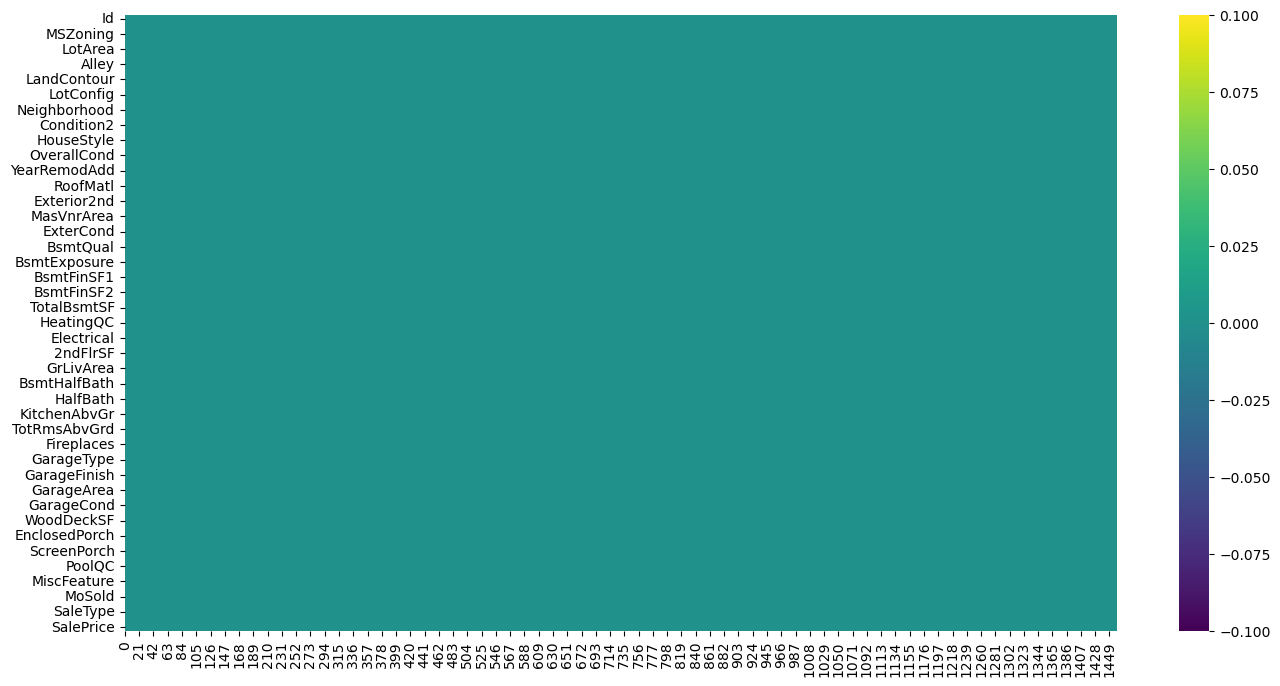

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(data.isna().transpose(),cmap='viridis')

<Axes: >

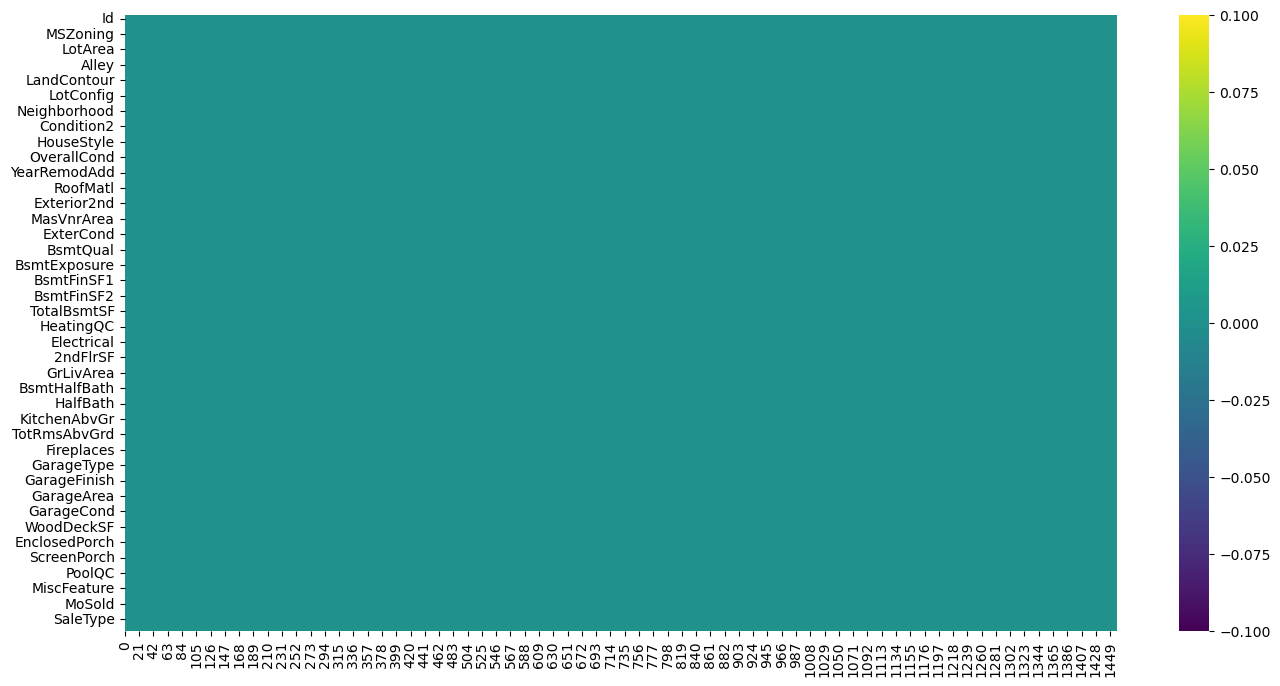

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(data_val.isna().transpose(),cmap='viridis')

In [17]:
print(data_val.isna().values.sum())
print('-'*10)
print(data.isna().values.sum())


0
----------
0


**Exploring the data**

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000'),
  Text(700000.0, 0, '700000'),
  Text(800000.0, 0, '800000')])

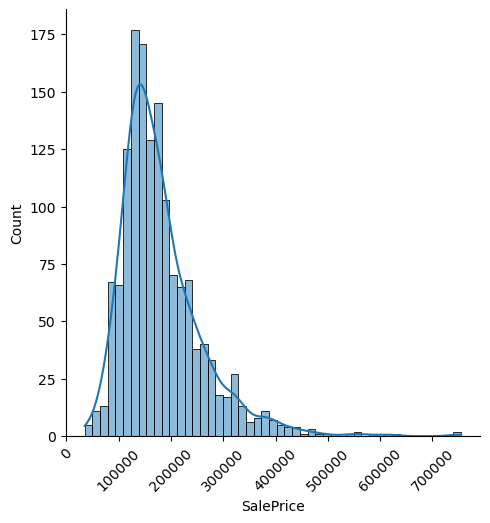

In [18]:
sns.displot(data["SalePrice"], kde=True)
plt.xticks(rotation = 45)

Text(0.5, 1.0, 'YearBuilt vs Sale Price')

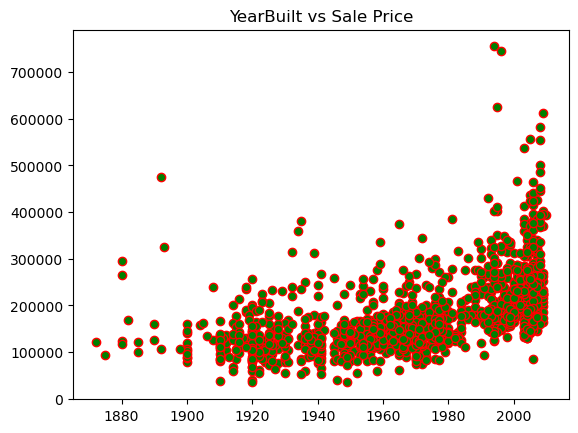

In [19]:
plt.figure(dpi=100)
plt.scatter(x=data["YearBuilt"], y=data["SalePrice"], c="green", edgecolor ="red")
plt.title('YearBuilt vs Sale Price')

Text(0.5, 1.0, 'YearSold vs Sale Price')

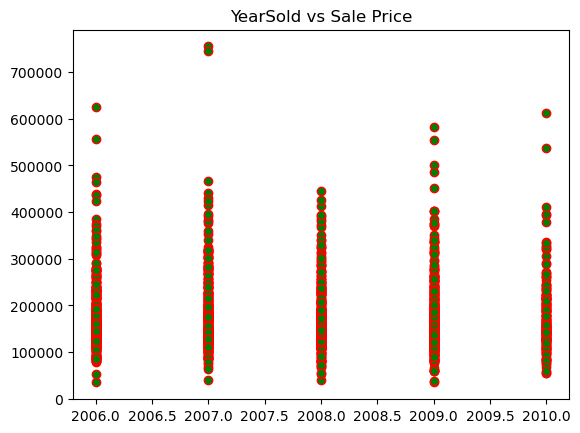

In [20]:
plt.figure(dpi=100)
plt.scatter(x=data["YrSold"], y=data["SalePrice"], c="green", edgecolor ="red")
plt.title('YearSold vs Sale Price')

Text(0.5, 1.0, 'Houses without remodel')

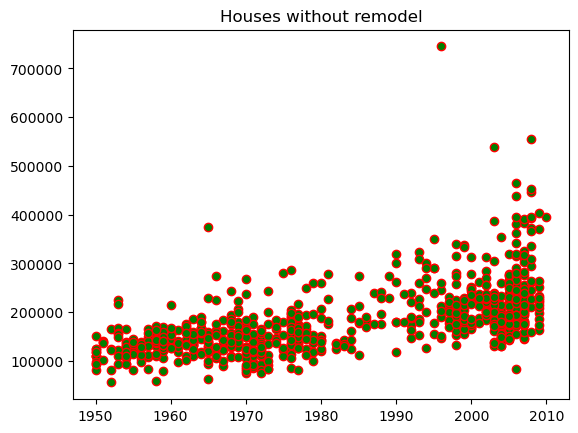

In [21]:
plt.figure(dpi=100)
plt.scatter(x=data[data["YearRemodAdd"] == data["YearBuilt"]]["YearBuilt"], y=data[data["YearRemodAdd"] == data["YearBuilt"]]["SalePrice"], c="green", edgecolor ="red")
plt.title("Houses without remodel")


Text(0.5, 1.0, 'Houses with remodel')

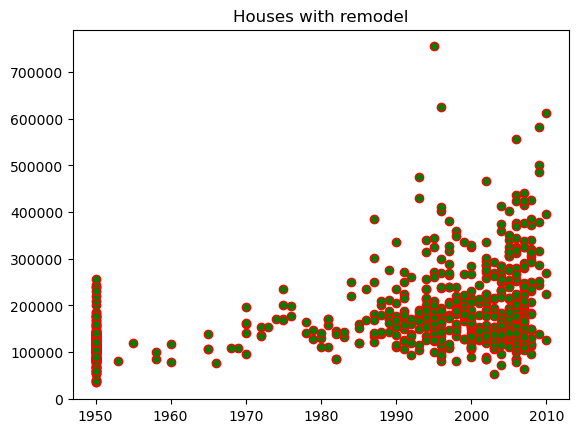

In [22]:
plt.figure(dpi=100)
plt.scatter(x=data[data["YearRemodAdd"] != data["YearBuilt"]]["YearRemodAdd"], y=data[data["YearRemodAdd"] != data["YearBuilt"]]["SalePrice"], c="green", edgecolor ="red")
plt.title("Houses with remodel")


Text(0.5, 1.0, 'SaleCondition vs Sale Price')

<Figure size 640x480 with 0 Axes>

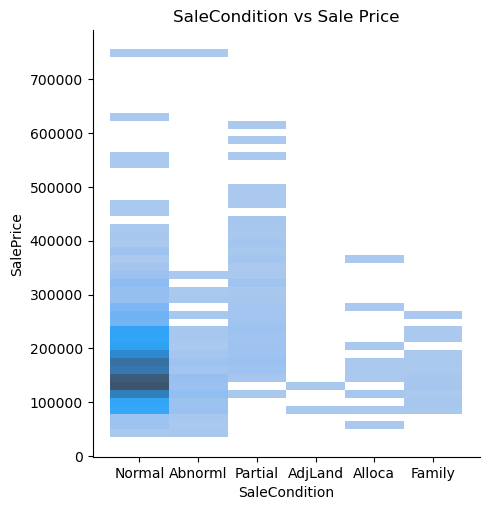

In [23]:
plt.figure(dpi=100)
sns.displot(x=data["SaleCondition"], y=data["SalePrice"])
plt.title('SaleCondition vs Sale Price')

In [24]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


**Convert the Data**

In [25]:
print(data.info())
print('-'*10)
print(data_val.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
data.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,1460,1460,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,3,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,5,5,5,7,NaN,7,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,6,7,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,4,5,5,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,No Fireplace,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,No Pool,No Fence,None,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,872,NaN,906,1282,647,649,1311,954,430,NaN,1257,NaN,NaN,NaN,1428,741,1365,1335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,690,870,NaN,686,NaN,NaN,1392,1407,1340,NaN,NaN,NaN,NaN,NaN,NaN,1453,1179,1406,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,69.863699,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.117123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1868.739726,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,22.027677,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,180.731373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,453.697295,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000

In [27]:
#Check the cardinality of the features in order to estabilsh the best way to encode the categorical values

data_columns = pd.DataFrame( {'columns'  : data.columns}, index= data.columns) 
unique_values = pd.DataFrame({'values': data.nunique()})
data_cardinality = pd.merge(left=data_columns, right=unique_values, how='inner', on=data_columns.index)


In [28]:
data_cardinality

,key_0,columns,values
0,Id,Id,1460
1,MSSubClass,MSSubClass,15
2,MSZoning,MSZoning,5
3,LotFrontage,LotFrontage,110
4,LotArea,LotArea,1073
5,Street,Street,2
6,Alley,Alley,3
7,LotShape,LotShape,4
8,LandContour,LandContour,4
9,Utilities,Utilities,2


In [29]:
#Data Correlation - continous values

Data_continous = data[['MiscVal', 'PoolArea', 'ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GrLivArea', 'LowQualFinSF', '2ndFlrSF', '1stFlrSF', 
                       'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'MasVnrArea', 'LotArea', 'LotFrontage', 'SalePrice']]

val_Data_continous = data_val[['MiscVal', 'PoolArea', 'ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GrLivArea', 'LowQualFinSF', '2ndFlrSF', '1stFlrSF', 
                       'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'MasVnrArea', 'LotArea', 'LotFrontage']]


In [30]:
df_corr = Data_continous.corr()['SalePrice']

In [31]:
df_corr.sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
MasVnrArea       0.472614
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotArea          0.263843
BsmtUnfSF        0.214479
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
MiscVal         -0.021190
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

In [32]:
#Data Conversion - Ordinal Features

map_list = [{'col': 'ExterQual', 'mapping': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}},
            {'col': 'ExterCond', 'mapping': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}},
            {'col': 'BsmtQual', 'mapping': {'No Basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}},
            {'col': 'BsmtCond', 'mapping': {'No Basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}},
            {'col': 'BsmtExposure', 'mapping': {'No Basement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}},
            {'col': 'BsmtFinType1', 'mapping': {'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ':6}},
            {'col': 'BsmtFinType2', 'mapping': {'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ':6}},
            {'col': 'HeatingQC', 'mapping': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}},
            {'col': 'FireplaceQu', 'mapping': {'No Fireplace': 0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}},
            {'col': 'GarageQual', 'mapping': {'No Garage': 0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}},
            {'col': 'GarageCond', 'mapping': {'No Garage': 0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}},
            {'col': 'PoolQC', 'mapping': {'No Pool': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}},
            {'col': 'KitchenQual', 'mapping': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}}



]

#https://github.com/scikit-learn-contrib/category_encoders/issues/228
#https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c


In [33]:
oh = OrdinalEncoder(mapping =map_list)

In [34]:
#Data Conversion

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

data_categ_OHE = data[[  
'MSSubClass',
'MSZoning',
'Street',
'Alley',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'YearBuilt',
'YearRemodAdd',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'CentralAir',
'Electrical',
'Functional',
'Fireplaces',
'GarageType',
'GarageCars',
'GarageYrBlt',
'GarageFinish',
'PavedDrive',
'Fence',
'MiscFeature',
'MoSold',
'YrSold',
'SaleType',
'SaleCondition',
'TotRmsAbvGrd',
'KitchenAbvGr',
'BedroomAbvGr',
'HalfBath',
'FullBath',
'BsmtHalfBath',
'BsmtFullBath'
]]


data_val_categ_OHE = data_val[[  
'MSSubClass',
'MSZoning',
'Street',
'Alley',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'YearBuilt',
'YearRemodAdd',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'CentralAir',
'Electrical',
'Functional',
'Fireplaces',
'GarageType',
'GarageCars',
'GarageYrBlt',
'GarageFinish',
'PavedDrive',
'Fence',
'MiscFeature',
'MoSold',
'YrSold',
'SaleType',
'SaleCondition',
'TotRmsAbvGrd',
'KitchenAbvGr',
'BedroomAbvGr',
'HalfBath',
'FullBath',
'BsmtHalfBath',
'BsmtFullBath'
]]


data_categ_OR = data[[  
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'KitchenQual',
'FireplaceQu',
'GarageQual',
'GarageCond',
'PoolQC'
]]

data_categ_val_OR = data[[  
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'KitchenQual',
'FireplaceQu',
'GarageQual',
'GarageCond',
'PoolQC'
]]

In [35]:
encoded_ohe_data_df =  pd.DataFrame(ohe.fit_transform(data_categ_OHE))

encoded_ohe_data_val_df = pd.DataFrame(ohe.transform(data_val_categ_OHE))

encoded_or_data_df = pd.DataFrame(oh.fit_transform(data_categ_OR))

encoded_or_data_val_df = pd.DataFrame(oh.transform(data_categ_val_OR))

In [36]:
#get the feature names
encoded_ohe_data_df.columns = ohe.get_feature_names_out()

encoded_or_data_df.columns=oh.get_feature_names()



In [37]:
encoded_ohe_data_df.head()



,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1990,YearRemo

In [38]:
encoded_or_data_df.head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,3,2,4,3,1,6,1,4,3,0,3,3,0
1,2,2,4,3,4,5,1,4,2,3,3,3,0
2,3,2,4,3,2,6,1,4,3,3,3,3,0
3,2,2,3,4,1,5,1,3,3,4,3,3,0
4,3,2,4,3,3,6,1,4,3,3,3,3,0


In [39]:
encoded_data_df =encoded_ohe_data_df.join(encoded_or_data_df)

In [40]:
encoded_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 555 entries, MSSubClass_20 to PoolQC
dtypes: float64(542), int64(13)
memory usage: 6.2 MB


In [41]:
processed_data_temp = encoded_data_df.join(Data_continous)

In [42]:
processed_data_temp.head() 


,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1990,YearRemo

In [43]:
processed_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 575 entries, MSSubClass_20 to SalePrice
dtypes: float64(544), int64(31)
memory usage: 6.4 MB


In [44]:
Target =['SalePrice'] 
Features = processed_data_temp.columns[:-1]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
processed_data_temp[Features], processed_data_temp[Target], test_size=0.2, random_state=0)

In [46]:
scal_cols = ['MiscVal', 'PoolArea', 'ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GrLivArea', 'LowQualFinSF', '2ndFlrSF', '1stFlrSF', 
                       'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'MasVnrArea', 'LotArea', 'LotFrontage']

In [47]:
X_train.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1990,YearRemo

In [48]:
X_test.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1990,YearRemo

In [49]:
#Scalling the continous features
Scaler = StandardScaler()
X_train[scal_cols] = Scaler.fit_transform(X_train[scal_cols])
X_test[scal_cols] = Scaler.transform(X_test[scal_cols])

In [50]:
X_train.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1990,YearRemo

In [51]:
X_train.shape

(1168, 574)

In [52]:
y_train.shape

(1168, 1)

In [53]:
X_test.shape

(292, 574)

In [54]:
X_test.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1990,YearRemo

In [55]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.GradientBoostingRegressor(),
    ensemble.RandomForestRegressor(),  
    XGBRegressor()    
    ]

In [56]:
cv_split = KFold(n_splits=5, shuffle=True,random_state= 0) 

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

scoring_metrics = ['r2', 'neg_root_mean_squared_error']

MLA_predict = y_train['SalePrice']
row_index =0

for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    cv_results = model_selection.cross_validate(alg, X_train, y_train, scoring = scoring_metrics, cv  = cv_split, return_train_score=True)
    MLA_compare.loc[row_index, 'MLA Time'] =cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train R2 Mean'] = '{:.2f}'.format(cv_results['train_r2'].mean())
    MLA_compare.loc[row_index, 'MLA Train neg_root_mean_squared_error Mean'] = '{:.2f}'.format(cv_results['train_neg_root_mean_squared_error'].mean())
    MLA_compare.loc[row_index, 'MLA Test R2 Mean'] = '{:.2f}'.format(cv_results['test_r2'].mean())   
    MLA_compare.loc[row_index, 'MLA Test neg_root_mean_squared_error Mean'] = '{:.2f}'.format(cv_results['test_neg_root_mean_squared_error'].mean())   
    row_index+=1
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time,MLA Train R2 Mean,MLA Train neg_root_mean_squared_error Mean,MLA Test R2 Mean,MLA Test neg_root_mean_squared_error Mean
0,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",NaN,NaN,0.554515,0.97,-13952.63,0.84,-30736.68
1,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",NaN,NaN,1.376555,0.98,-11686.17,0.84,-31071.53
2,XGBRegressor,"{'objective': 'reg:squarederror', 'base_score'...",NaN,NaN,0.508503,1.00,-1811.92,0.82,-33292.92


In [57]:
#tesst
scoring_metrics2 = ['r2', 'neg_root_mean_squared_error']
for alg in MLA:
    cv_results4 = model_selection.cross_validate(alg, X_train, y_train, scoring = scoring_metrics2, cv  = cv_split, return_train_score=True)
    alg.fit(X_train,y_train.values.ravel())
    print(alg.__class__.__name__)
    print('fit_time_mean' , cv_results4['fit_time'].mean())
    print('fit_time'  ,cv_results4['fit_time'])
    print('train_r2' ,cv_results4['train_r2'])
    print('train_r2_mean' ,cv_results4['train_r2'].mean())
    print( 'test_r2',cv_results4['test_r2'])
    print( 'test_r2_mean',cv_results4['test_r2'].mean())
    print('train_train_neg_root_mean_squared_error',cv_results4['train_neg_root_mean_squared_error'])
    print('train_train_neg_root_mean_squared_error_mean',cv_results4['train_neg_root_mean_squared_error'].mean())
    print('test_neg_root_mean_squared_error',cv_results4['test_neg_root_mean_squared_error'])
    print('test_neg_root_mean_squared_error_mean',cv_results4['test_neg_root_mean_squared_error'].mean())



GradientBoostingRegressor
fit_time_mean 0.5502978324890136
fit_time [0.55926514 0.55664396 0.54671001 0.54118705 0.547683  ]
train_r2 [0.96812218 0.96615792 0.96779301 0.96940503 0.97022545]
train_r2_mean 0.9683407181663286
test_r2 [0.88902315 0.85412666 0.86429623 0.71742304 0.88911261]
test_r2_mean 0.8427963375180545
train_train_neg_root_mean_squared_error [-14195.78516062 -14140.37367196 -14048.5844338  -13630.96639363
 -13747.42197568]
train_train_neg_root_mean_squared_error_mean -13952.626327135786
test_neg_root_mean_squared_error [-24681.34850927 -32251.87567897 -29093.0355207  -42835.18980847
 -24313.56358459]
test_neg_root_mean_squared_error_mean -30635.00262040011
RandomForestRegressor
fit_time_mean 1.345097589492798
fit_time [1.38459015 1.33596206 1.35355282 1.32034993 1.33103299]
train_r2 [0.97562984 0.97875529 0.97782208 0.98078694 0.97966122]
train_r2_mean 0.9785310718419872
test_r2 [0.85971922 0.85367004 0.84877311 0.80111071 0.86317868]
test_r2_mean 0.8452903506064635
tr

In [58]:
GBR_before = ensemble.GradientBoostingRegressor()
base_results = model_selection.cross_validate(GBR_before, X_train, y_train,  scoring = scoring_metrics,  cv  = cv_split, return_train_score=True)
GBR_before.fit(X_train, y_train)

print("Before GBR params", GBR_before.get_params())
print("Before GBR R2 train mean score: {:.2f}".format(base_results['train_r2'].mean()))
print("Before GBR  R2 Test mean score: {:.2f}".format(base_results['test_r2'].mean()))
print('Before GBR neg_root_mean_squared_error train mean score',base_results['train_neg_root_mean_squared_error'].mean())
print('Before GBR neg_root_mean_squared_error test mean score',base_results['test_neg_root_mean_squared_error'].mean())
print('-'*10)


Before GBR params {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Before GBR R2 train mean score: 0.97
Before GBR  R2 Test mean score: 0.84
Before GBR neg_root_mean_squared_error train mean score -13952.62632713579
Before GBR neg_root_mean_squared_error test mean score -30944.781942703918
----------


In [59]:
#Searching for best params for our model

#max_depth - the maximum depth of the tree -used to controll overfitting. The higher the depth the more specific the tree is 
#learning_rate - determines impact of each tree on the final outcome
#n_estimators- number of trees 
#min_sample_split -  the minimum number of observations required to split an internal node
#subsample - the fraction of observations to be used in individual tree


params ={"learning_rate": [0.01,0.1,1,10,100], 
         "max_depth": [1,3,5,7,9],
         "n_estimators": [5, 50, 250, 500],
         "subsample": [0.7, 0.8, 0.9, 1],
         "min_samples_split": [0.5, 1, 1.5, 2],
         
}

tune_model = model_selection.GridSearchCV(ensemble.GradientBoostingRegressor(), param_grid=params,scoring = scoring_metrics, refit ='neg_root_mean_squared_error',  return_train_score=True)
tune_model.fit(X_train, y_train)

print('After tune_model parameters', tune_model.best_params_)
print("AFTER tune_model Training r2 score mean: {:.2f}". format(tune_model.cv_results_['mean_train_r2'][tune_model.best_index_])) 
print("AFTER tune_model Test r2 score mean: {:.2f}". format(tune_model.cv_results_['mean_test_r2'][tune_model.best_index_]))
print("AFTER tune_model Training  neg_root_mean_squared_error score mean: {:.2f}". format(tune_model.cv_results_['mean_train_neg_root_mean_squared_error'][tune_model.best_index_])) 
print("AFTER tune_model Test neg_root_mean_squared_error score mean: {:.2f}". format(tune_model.cv_results_['mean_test_neg_root_mean_squared_error'][tune_model.best_index_]))
print('-'*10)

After tune_model parameters {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.7}
AFTER tune_model Training r2 score mean: 0.98
AFTER tune_model Test r2 score mean: 0.86
AFTER tune_model Training  neg_root_mean_squared_error score mean: -9999.40
AFTER tune_model Test neg_root_mean_squared_error score mean: -28464.57
----------


In [60]:
# Given the high number of features(500+), we're gonna be running recursing feature elimination (RFE) in order to reduce overfitting.


GBR_RFE = RecursiveFeatureElimination (
    estimator = ensemble.GradientBoostingRegressor(learning_rate= 0.01, max_depth=5, min_samples_split= 2, n_estimators= 500, subsample = 0.7),
    scoring = 'neg_root_mean_squared_error',
    threshold= 100,
    cv=5

)

GBR_RFE.fit(X_train, y_train)


RecursiveFeatureElimination(cv=5,
                            estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                                max_depth=5,
                                                                n_estimators=500,
                                                                subsample=0.7),
                            scoring='neg_root_mean_squared_error',
                            threshold=100)

In [61]:
GBR_RFE.initial_model_performance_

-28572.11431661348

In [62]:
print(X_train.columns[GBR_RFE.get_support()])

Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_60', 'MSSubClass_75', 'MSSubClass_85', 'MSSubClass_160',
       'MSZoning_FV', 'MSZoning_RH',
       ...
       'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'GrLivArea', '2ndFlrSF',
       'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'LotArea', 'LotFrontage'],
      dtype='object', length=272)


In [63]:
GBR_RFE.estimator

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=500,
                          subsample=0.7)

In [64]:
ft_imp = pd.DataFrame (GBR_RFE.feature_importances_)

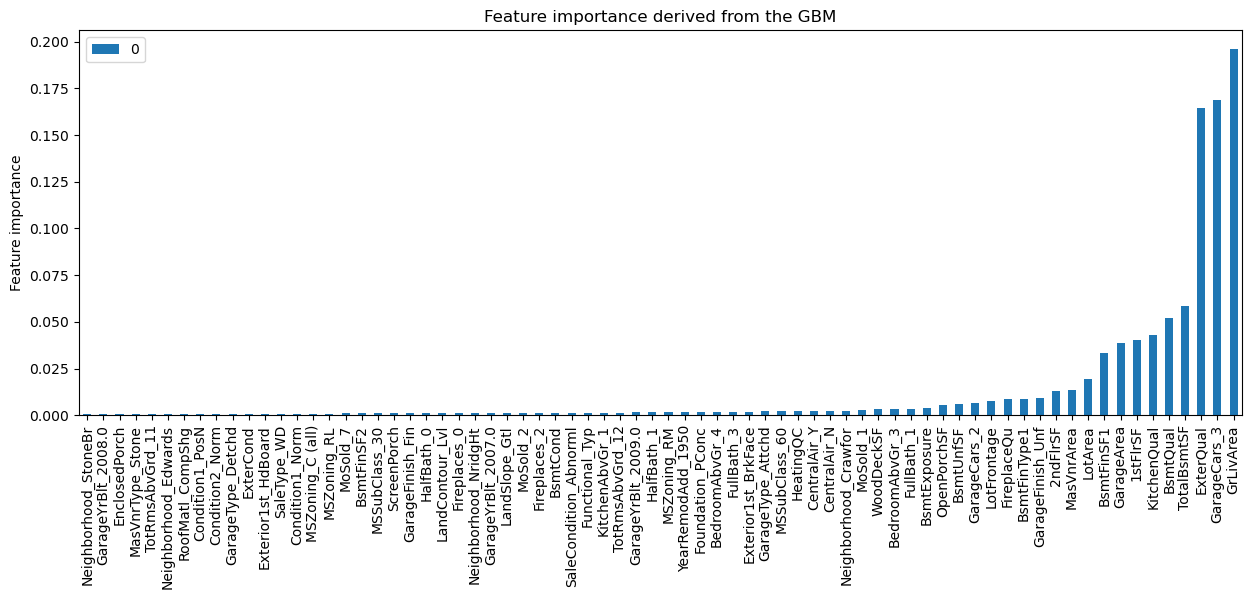

In [65]:
#Checking the feature importance
ft_imp[ft_imp[0].round(4)>0.0005].plot.bar(figsize=(15,5))
plt.ylabel('Feature importance')
plt.title('Feature importance derived from the GBM')
plt.show()

In [66]:
#We reduce the training and testing data to the selected variables.
X_train_t = GBR_RFE.transform(X_train)

X_test_t = GBR_RFE.transform(X_test)

In [67]:
X_train_t.shape

(1168, 272)

In [68]:
X_test_t.shape

(292, 272)

In [69]:
#Testing 3 GBR models: one with the rfe selected features(359), and one with the most important features derived from Gradient boosting model, and one with all the features

GBR_RFE_all_feat = ensemble.GradientBoostingRegressor(learning_rate= 0.01, max_depth=5, min_samples_split= 2, n_estimators= 500, subsample = 0.7)

GBR_RFE_imp_features = ensemble.GradientBoostingRegressor(learning_rate= 0.01, max_depth=5, min_samples_split= 2, n_estimators= 500, subsample = 0.7)

In [70]:
imp_feat_list=ft_imp[ft_imp[0].round(4)>0.0005].index.tolist()


In [71]:
print(imp_feat_list)

['Neighborhood_StoneBr', 'GarageYrBlt_2008.0', 'EnclosedPorch', 'MasVnrType_Stone', 'TotRmsAbvGrd_11', 'Neighborhood_Edwards', 'RoofMatl_CompShg', 'Condition1_PosN', 'Condition2_Norm', 'GarageType_Detchd', 'ExterCond', 'Exterior1st_HdBoard', 'SaleType_WD', 'Condition1_Norm', 'MSZoning_C (all)', 'MSZoning_RL', 'MoSold_7', 'BsmtFinSF2', 'MSSubClass_30', 'ScreenPorch', 'GarageFinish_Fin', 'HalfBath_0', 'LandContour_Lvl', 'Fireplaces_0', 'Neighborhood_NridgHt', 'GarageYrBlt_2007.0', 'LandSlope_Gtl', 'MoSold_2', 'Fireplaces_2', 'BsmtCond', 'SaleCondition_Abnorml', 'Functional_Typ', 'KitchenAbvGr_1', 'TotRmsAbvGrd_12', 'GarageYrBlt_2009.0', 'HalfBath_1', 'MSZoning_RM', 'YearRemodAdd_1950', 'Foundation_PConc', 'BedroomAbvGr_4', 'FullBath_3', 'Exterior1st_BrkFace', 'GarageType_Attchd', 'MSSubClass_60', 'HeatingQC', 'CentralAir_Y', 'CentralAir_N', 'Neighborhood_Crawfor', 'MoSold_1', 'WoodDeckSF', 'BedroomAbvGr_3', 'FullBath_1', 'BsmtExposure', 'OpenPorchSF', 'BsmtUnfSF', 'GarageCars_2', 'LotFro

In [72]:
GBR_RFE_all_feat.fit(X_train_t,y_train)
GBR_RFE_all_feat_test = GBR_RFE_all_feat.predict(X_test_t)

In [73]:
#Kaggle competition evaluation: 
#Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. 
#(Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

R2_all_feat = r2_score(y_test['SalePrice'],GBR_RFE_all_feat_test)
MAE_all_feat = mean_absolute_error(y_test['SalePrice'], GBR_RFE_all_feat_test)
RMSE_all_feat = np.sqrt(mean_squared_error(np.log(y_test['SalePrice']), np.log(GBR_RFE_all_feat_test)))

print(f'R2 score for model with all RFE selected features is: {R2_all_feat}')
print('---')
print(f'MAE score for model with all RFE selected features is: {MAE_all_feat}')
print('---')
print(f'RMSE (of log predictions and target score) for model with all RFE selected features is: {RMSE_all_feat}')


R2 score for model with all RFE selected features is: 0.8899679986428886
---
MAE score for model with all RFE selected features is: 16460.440908718996
---
RMSE (of log predictions and target score) for model with all RFE selected features is: 0.1312546191288354


In [74]:
#Kaggle competition evaluation: 
#Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. 
#(Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

GBR_RFE_imp_features.fit(X_train[imp_feat_list],y_train)
GBR_RFE_imp_features_test = GBR_RFE_imp_features.predict(X_test[imp_feat_list])

R2_imp_feat = r2_score(y_test['SalePrice'],GBR_RFE_imp_features_test)
MAE_imp_feat = mean_absolute_error(y_test['SalePrice'], GBR_RFE_imp_features_test)
RMSE_imp_feat = np.sqrt(mean_squared_error(np.log(y_test['SalePrice']), np.log(GBR_RFE_imp_features_test)))

print(f'R2 score for model with all RFE selected features is: {R2_imp_feat}')
print('---')
print(f'MAE score for model with all RFE selected features is: {MAE_imp_feat}')
print('---')
print(f'RMSE (of log predictions and target score) for model with all RFE selected features is: {RMSE_imp_feat}')

R2 score for model with all RFE selected features is: 0.8760260627578488
---
MAE score for model with all RFE selected features is: 17017.109420371333
---
RMSE (of log predictions and target score) for model with all RFE selected features is: 0.13152000557526777


In [75]:
GBR_test = ensemble.GradientBoostingRegressor(learning_rate= 0.01, max_depth=5, min_samples_split= 2, n_estimators= 500, subsample = 0.7)
GBR_test.fit(X_train,y_train)
test_pred = GBR_test.predict(X_test)

In [76]:
#Kaggle competition evaluation: 
#Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. 
#(Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

R2_test =r2_score(y_test['SalePrice'], test_pred)
MAE_test = mean_absolute_error(y_test['SalePrice'], test_pred)
RMSE_test = np.sqrt(mean_squared_error(np.log(y_test['SalePrice']), np.log(test_pred)))


print(f'R2 score for model with all features is: {R2_test}')
print('---')
print(f'MAE score for model with all features is: {MAE_test}')
print('---')
print(f'RMSE (of log predictions and target score) for model with all features is: {RMSE_test}')


R2 score for model with all features is: 0.8767711784528163
---
MAE score for model with all features is: 17090.847318629385
---
RMSE (of log predictions and target score) for model with all features is: 0.13323897340541382


In [77]:
#Getting the validation data ready 


encoded_ohe_data_val_df

encoded_or_data_val_df

encoded_ohe_data_val_df.columns = ohe.get_feature_names_out()

encoded_or_data_val_df.columns=oh.get_feature_names()

encoded_data_val_df =encoded_ohe_data_val_df.join(encoded_or_data_val_df)

processed_data= encoded_data_val_df.join(val_Data_continous)




In [78]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 574 entries, MSSubClass_20 to LotFrontage
dtypes: float64(549), int64(25)
memory usage: 6.4 MB


In [79]:
processed_data[scal_cols] = Scaler.transform(processed_data[scal_cols])

In [80]:
processed_data.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1990,YearRemo

In [81]:
data_val['SalePrice'] = GBR_test.predict(processed_data[Features])

In [82]:
submit_1 = data_val[['Id', 'SalePrice']]
submit_1.to_csv("submit_1.csv", index=False)